<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/FinalAdvanceAiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=1000):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.epochs = epochs

        # Initialize Q matrix with zeros
        self.Q = np.zeros((num_nodes, num_nodes))

        # Initialize rewards matrix
        self.R = np.zeros((num_nodes, num_nodes))

    def add_edge(self, start_node, end_node, reward):
        self.R[start_node][end_node] = reward

    def train(self):
        for epoch in range(self.epochs):
            current_state = np.random.randint(0, self.num_nodes)

            while current_state not in self.destinations:
                possible_moves = np.where(self.R[current_state] > 0)[0]
                if np.random.rand() < self.exploration_prob:
                    action = np.random.choice(possible_moves)
                else:
                    action = np.argmax(self.Q[current_state])

                next_state = action
                reward = self.R[current_state][action]

                self.Q[current_state][action] = reward + self.discount_factor * np.max(self.Q[next_state])

                current_state = next_state

    def find_optimal_path(self, start_node):
        current_state = start_node
        optimal_path = [current_state]

        while current_state not in self.destinations:
            action = np.argmax(self.Q[current_state])
            current_state = action
            optimal_path.append(current_state)

        return optimal_path

# Example usage
num_nodes = 5
destinations = [3, 4]
q_learning = QLearning(num_nodes, destinations)

# Add edges and rewards (adjust the rewards based on your specific graph)
q_learning.add_edge(0, 1, 10)
q_learning.add_edge(0, 2, 5)
q_learning.add_edge(1, 3, 20)
q_learning.add_edge(2, 3, 30)
q_learning.add_edge(3, 4, 100)

# Train the Q-learning model
q_learning.train()

# Find optimal path for each node to the closest destination
for start_node in range(num_nodes):
    optimal_path = q_learning.find_optimal_path(start_node)
    print(f"Optimal path from node {start_node} to the closest destination: {optimal_path}")


Optimal path from node 0 to the closest destination: [0, 2, 3]
Optimal path from node 1 to the closest destination: [1, 3]
Optimal path from node 2 to the closest destination: [2, 3]
Optimal path from node 3 to the closest destination: [3]
Optimal path from node 4 to the closest destination: [4]


In [3]:
!pip install networkx

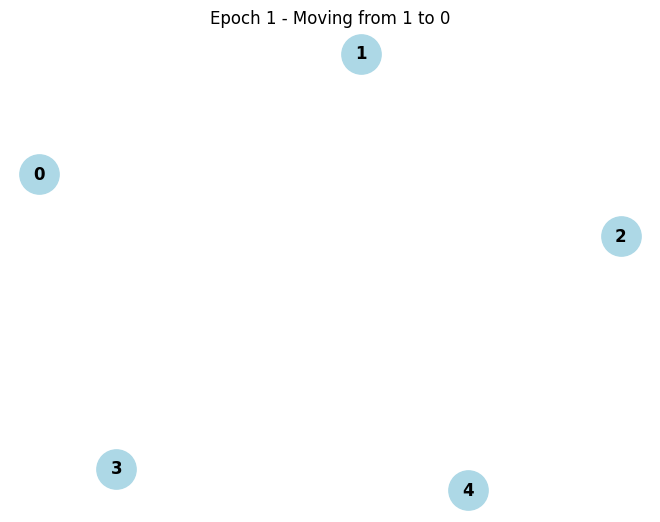

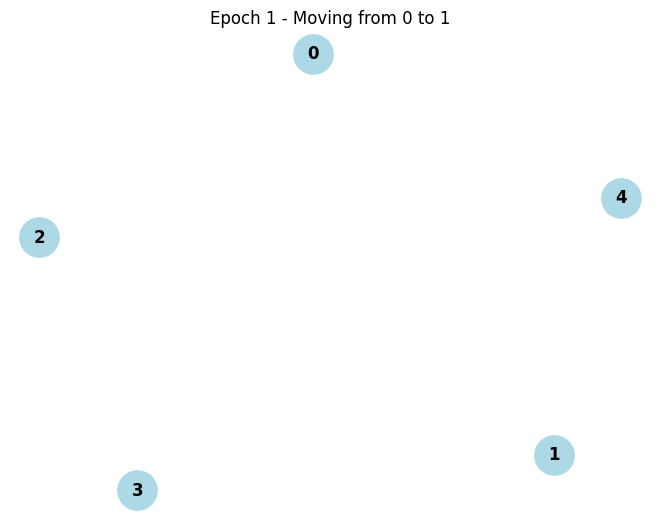

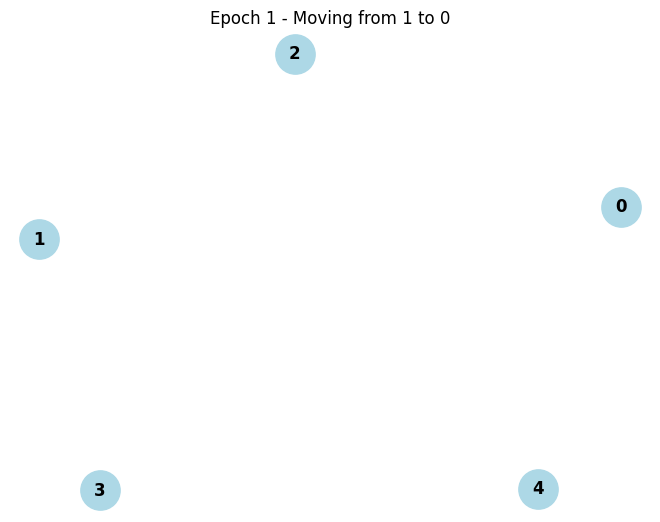

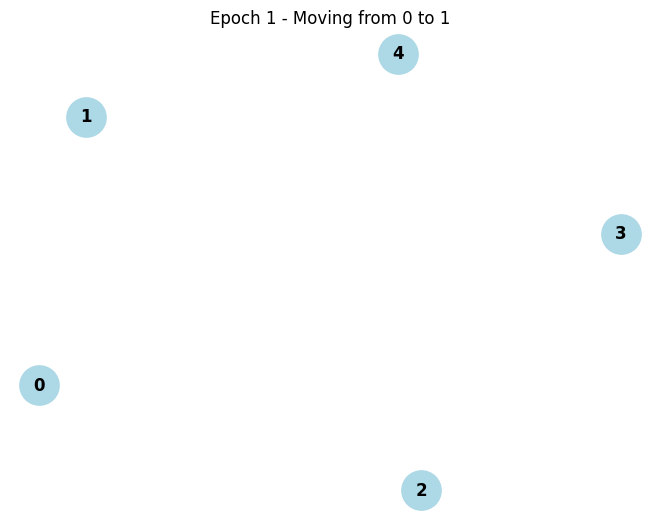

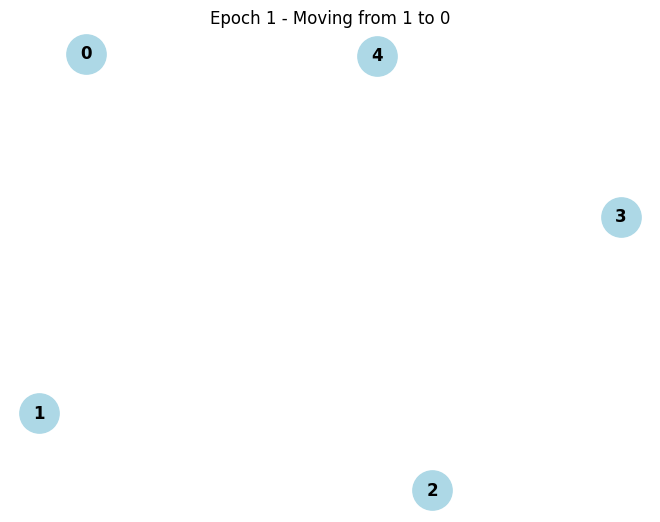

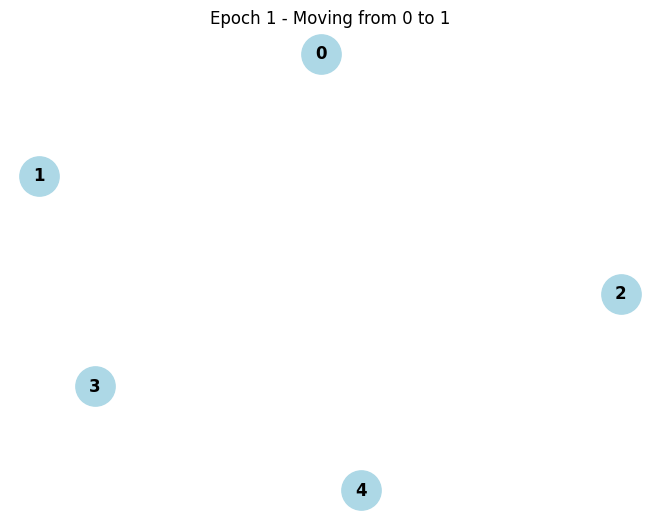

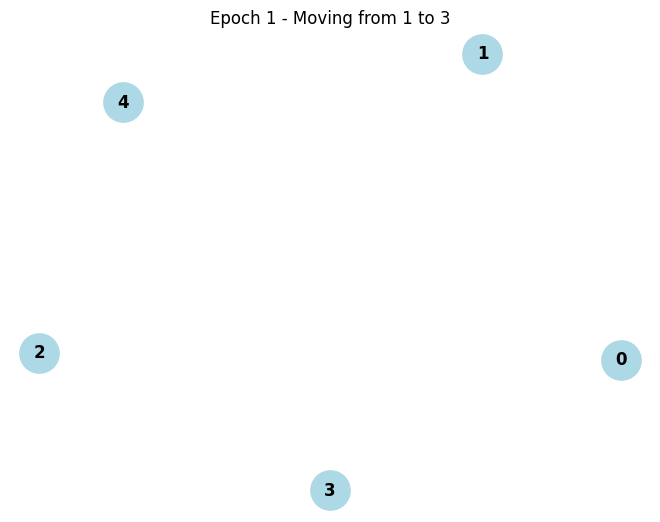

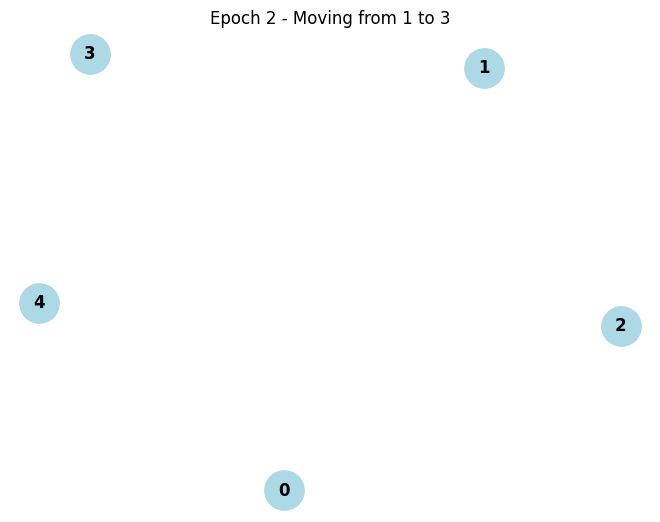

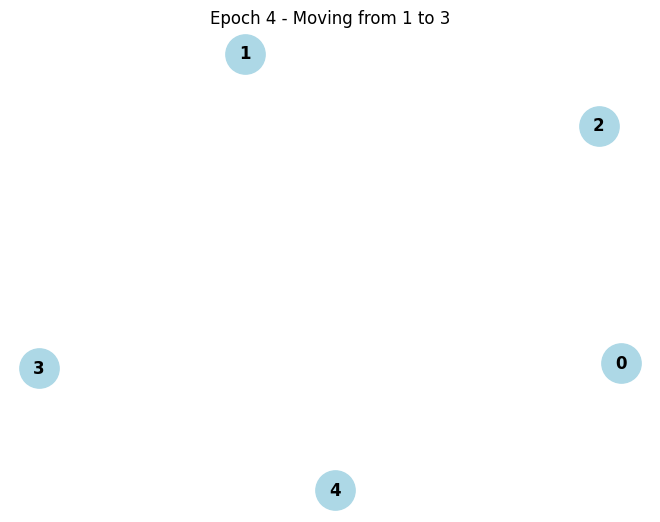

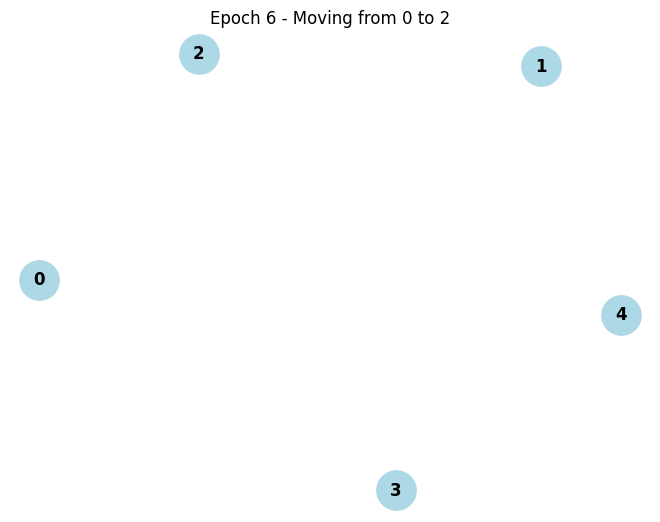

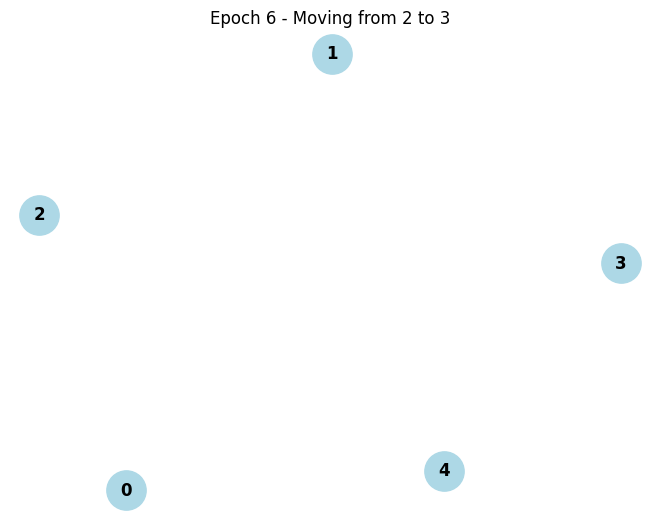

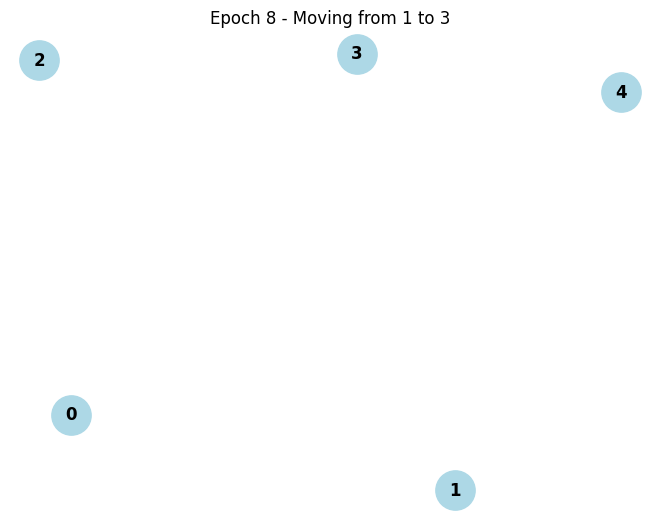

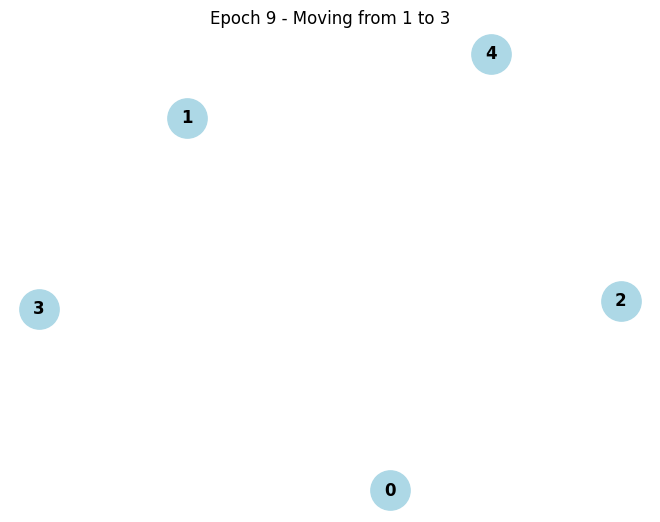

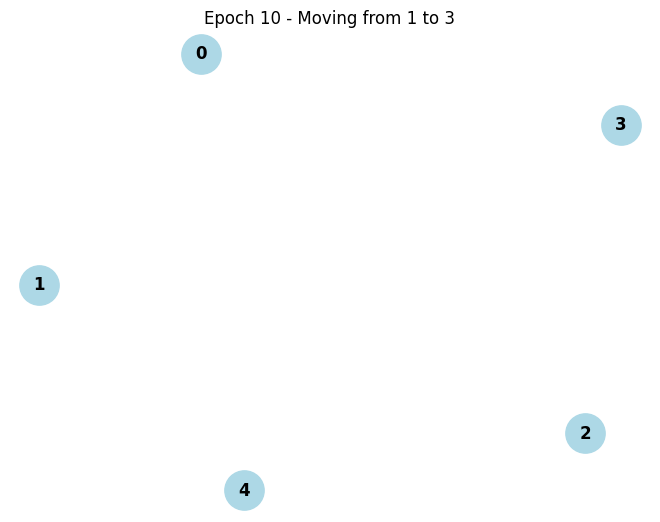

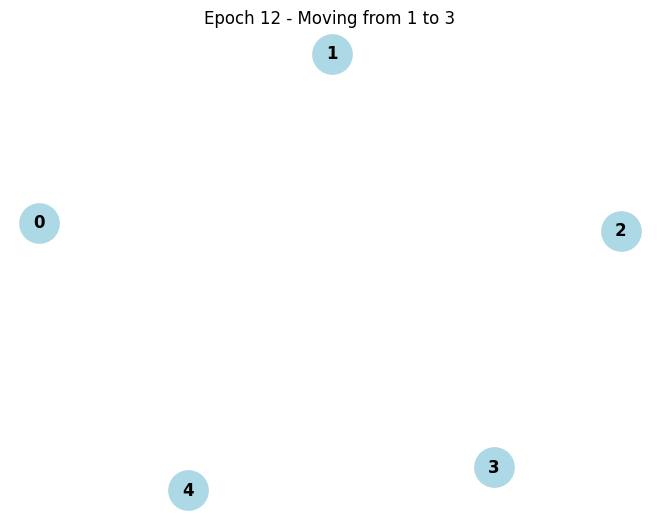

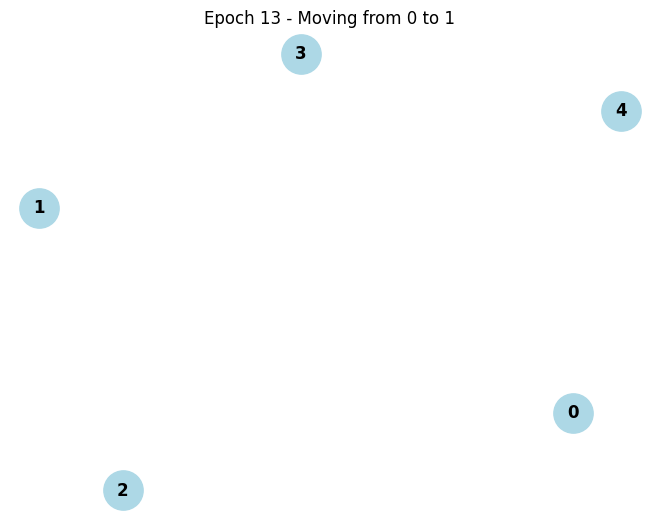

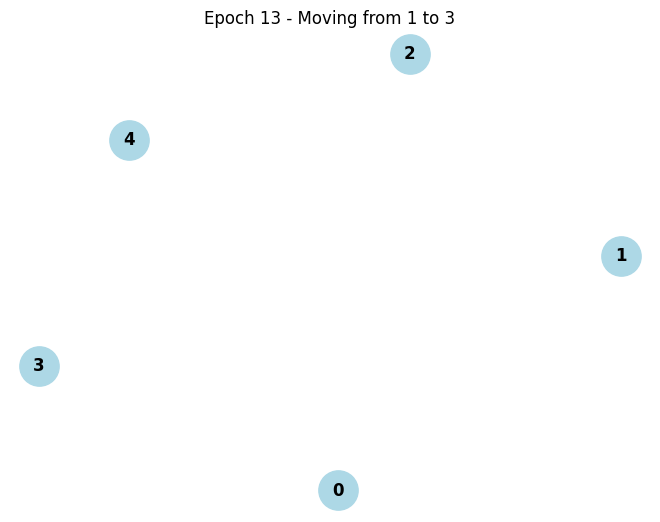

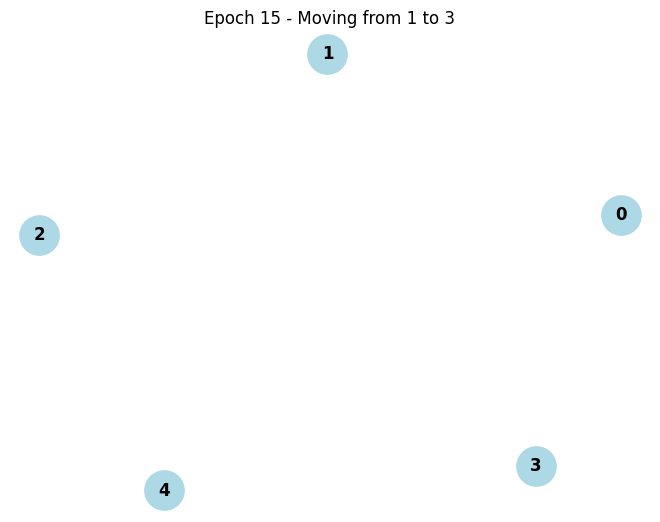

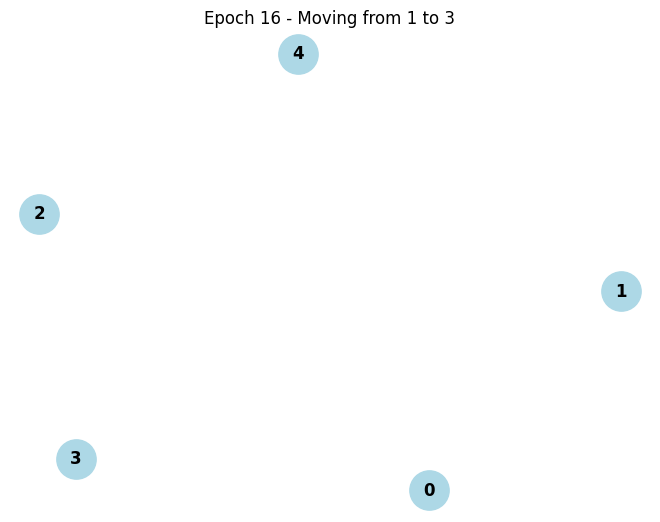

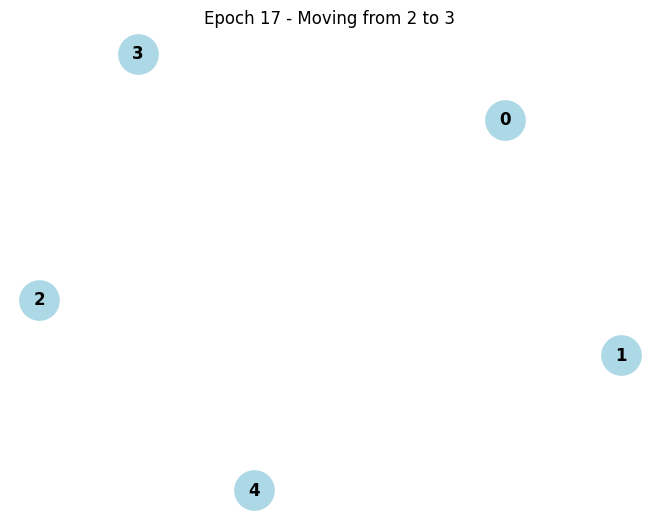

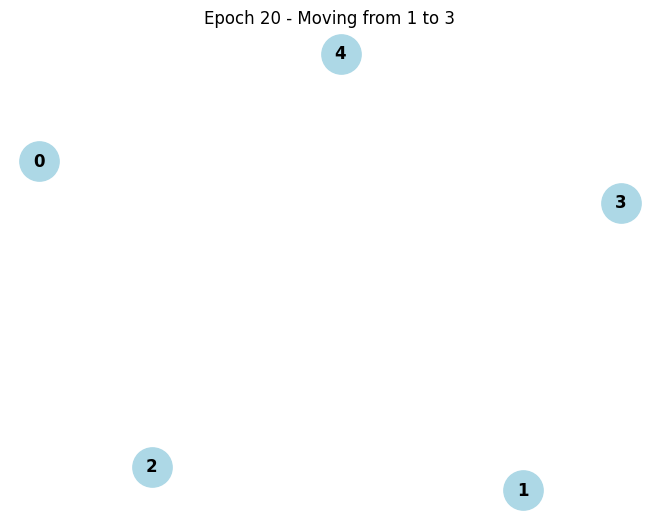

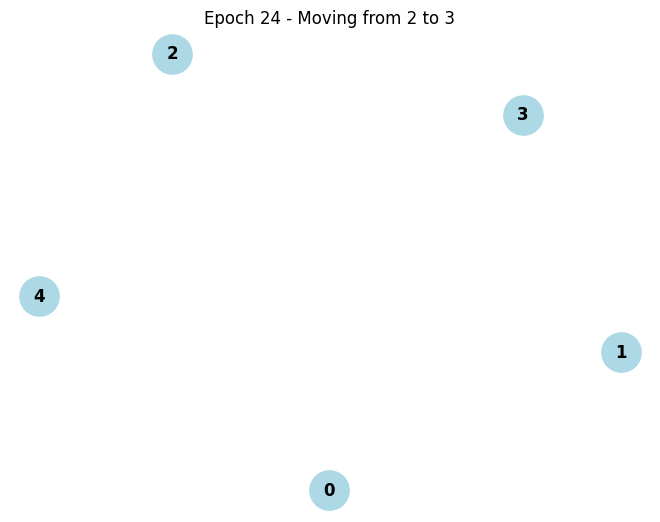

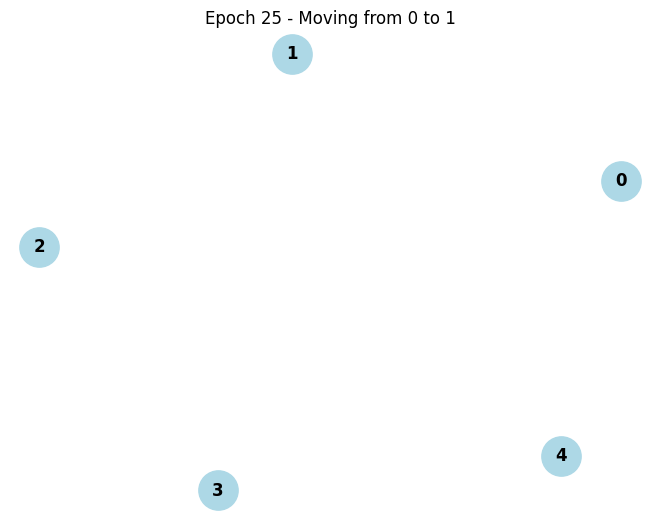

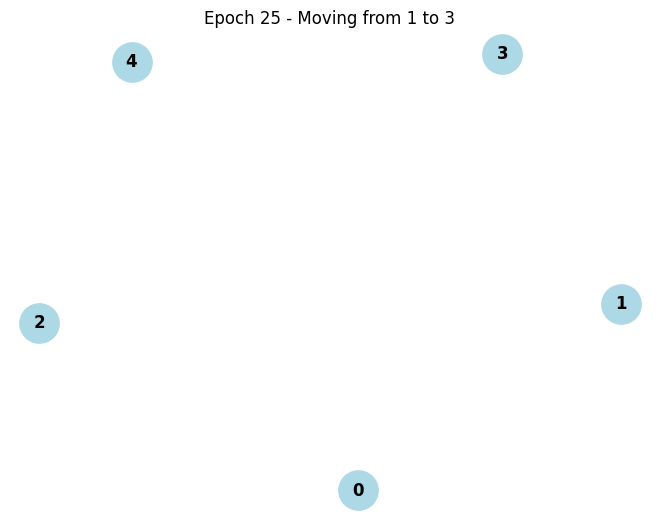

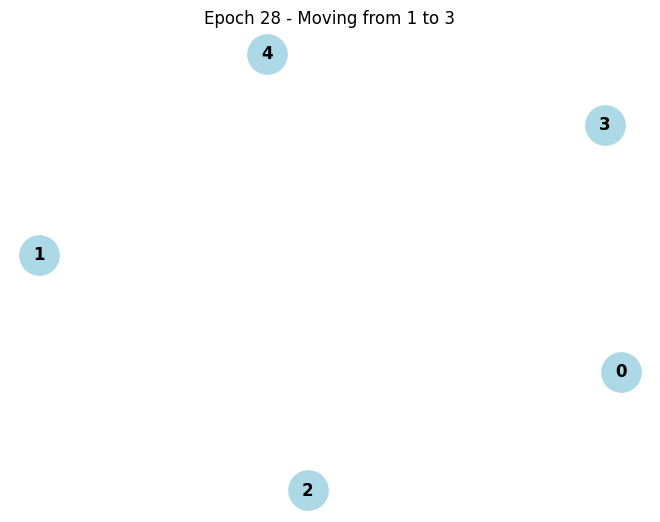

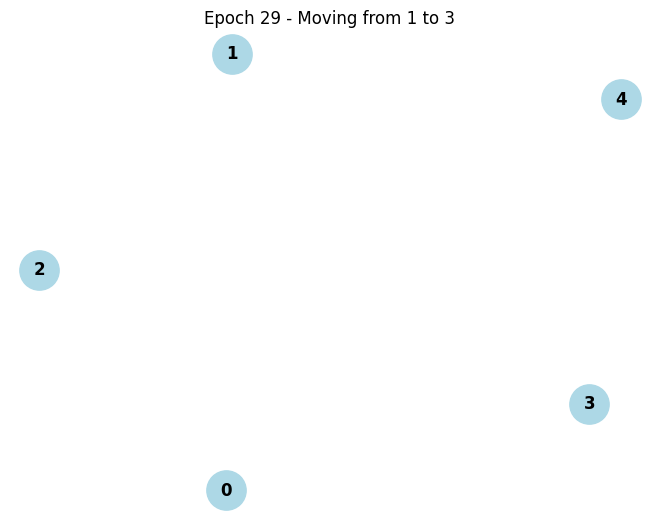

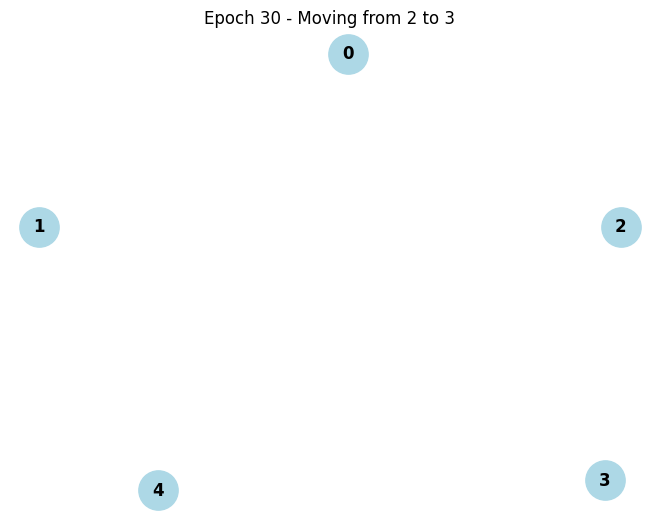

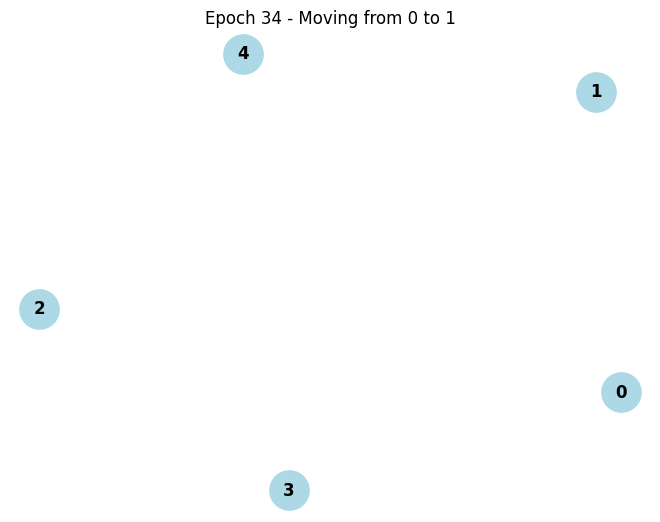

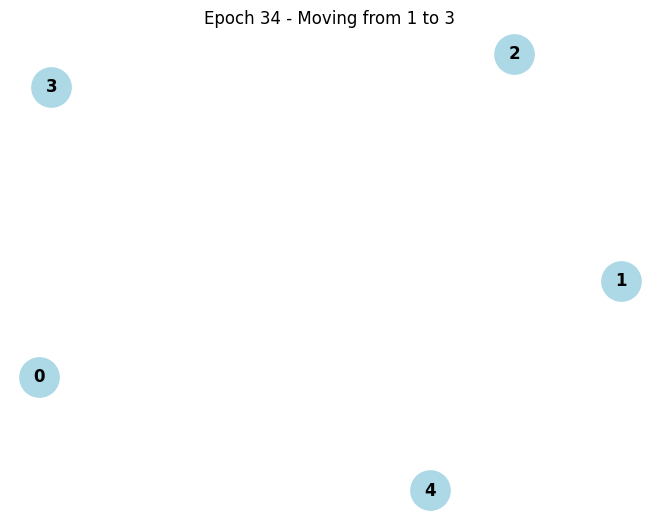

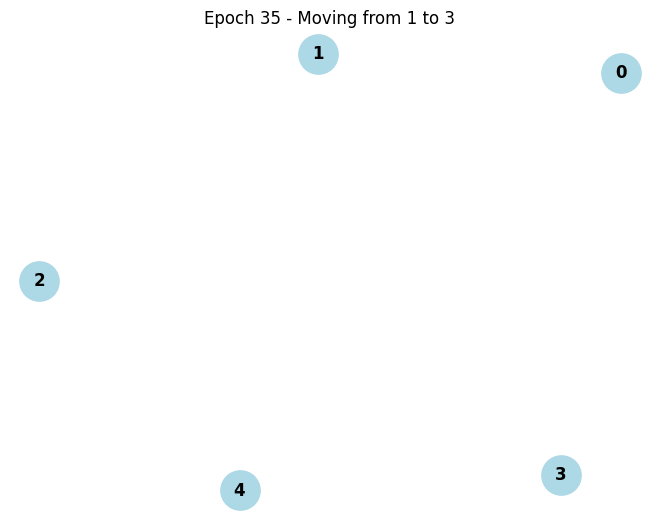

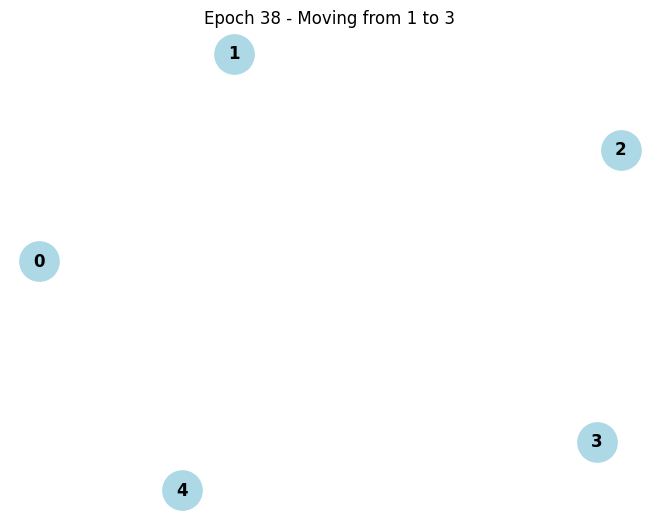

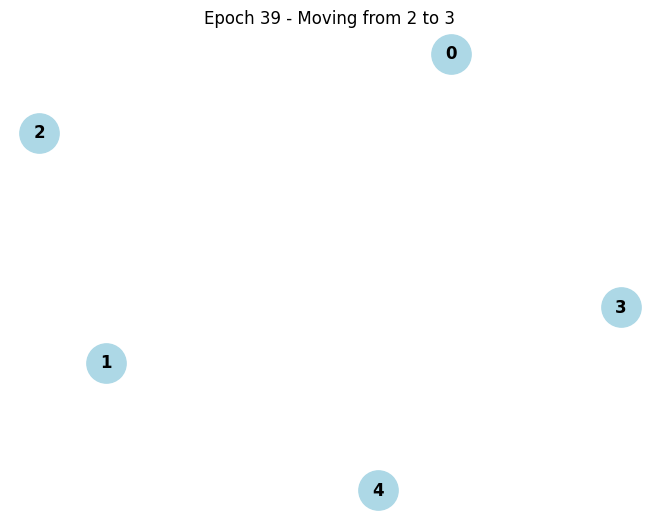

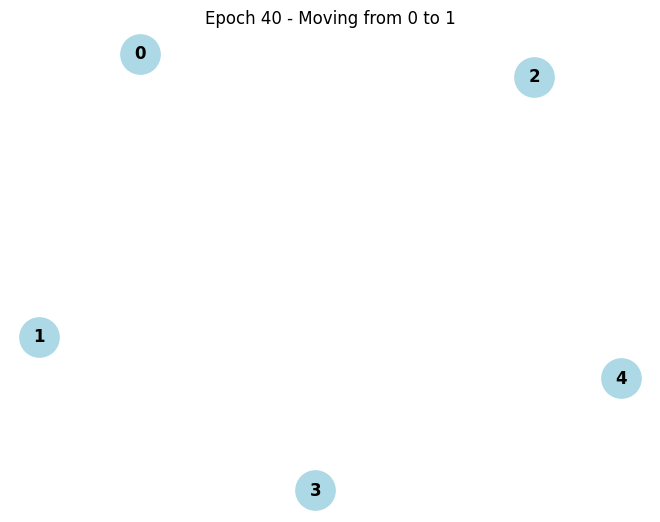

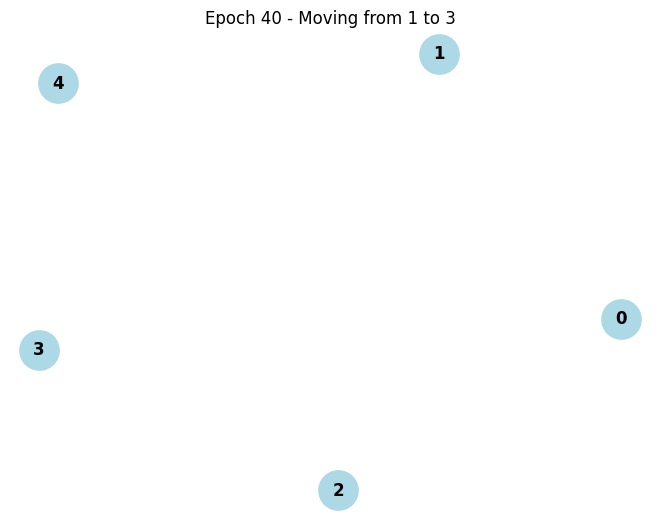

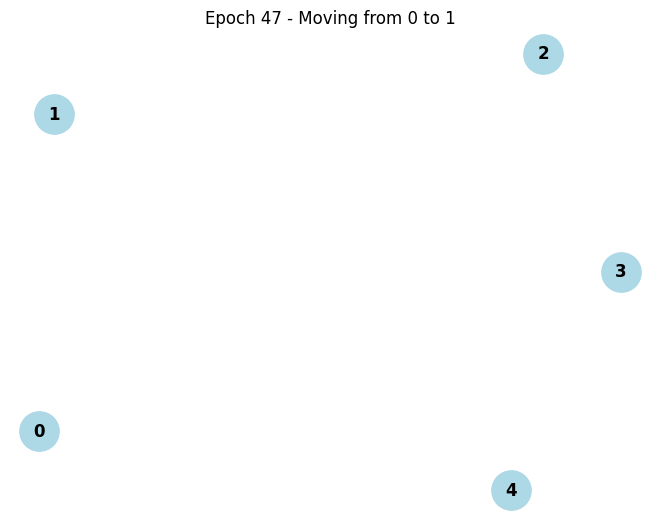

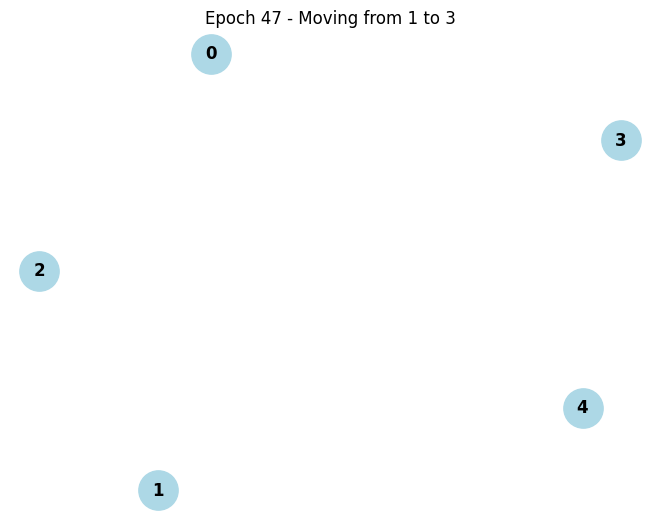

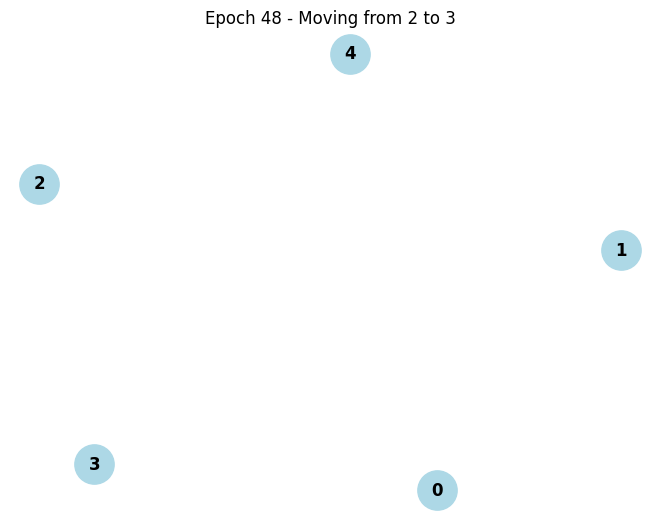

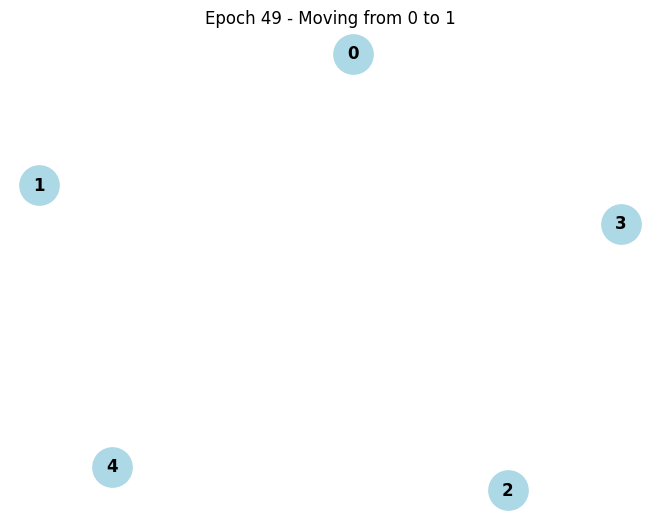

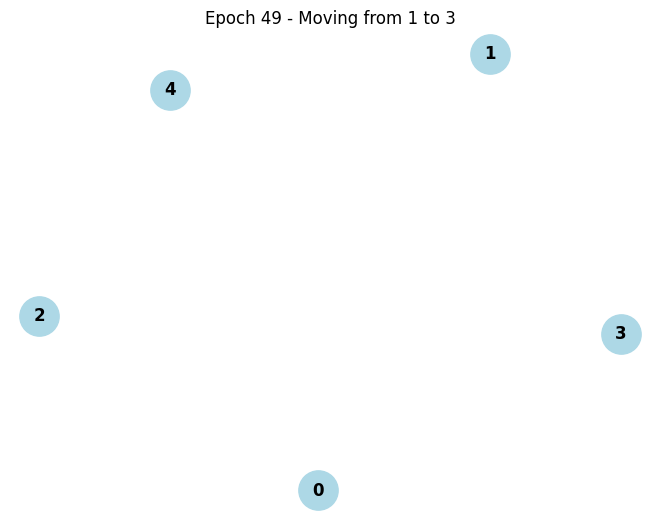

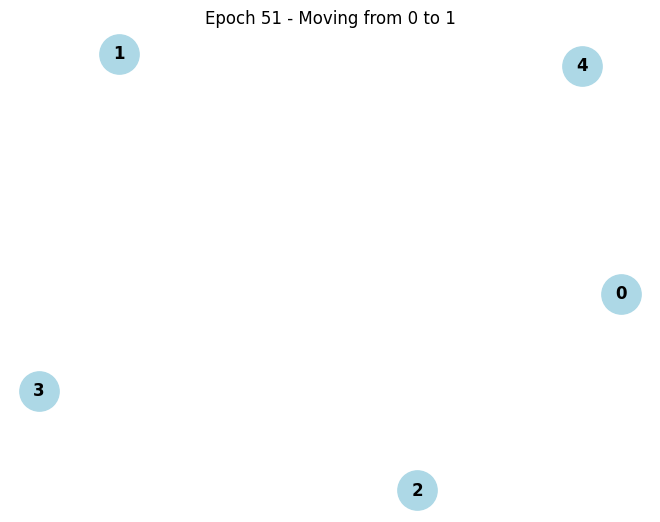

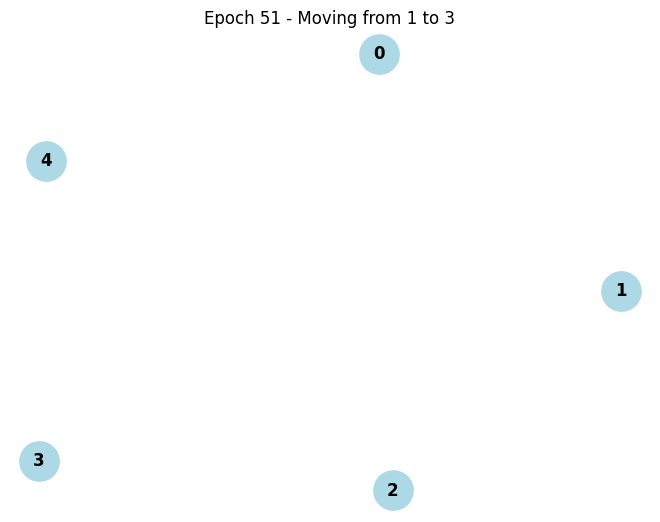

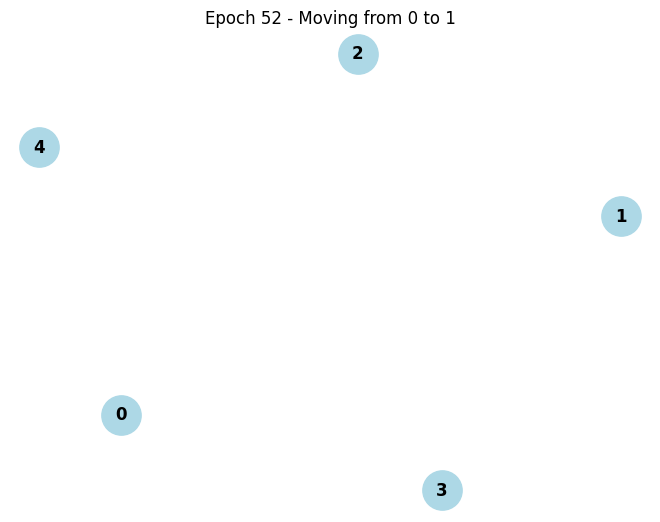

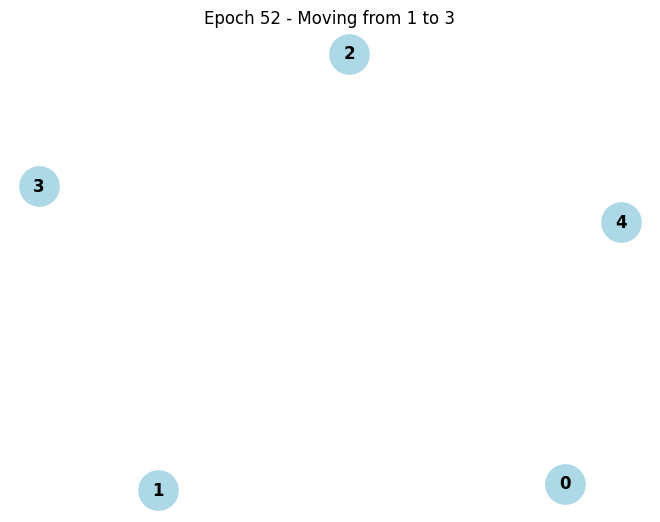

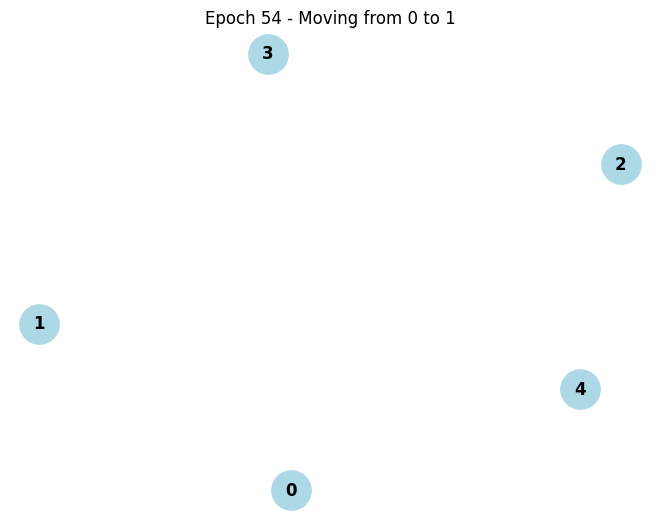

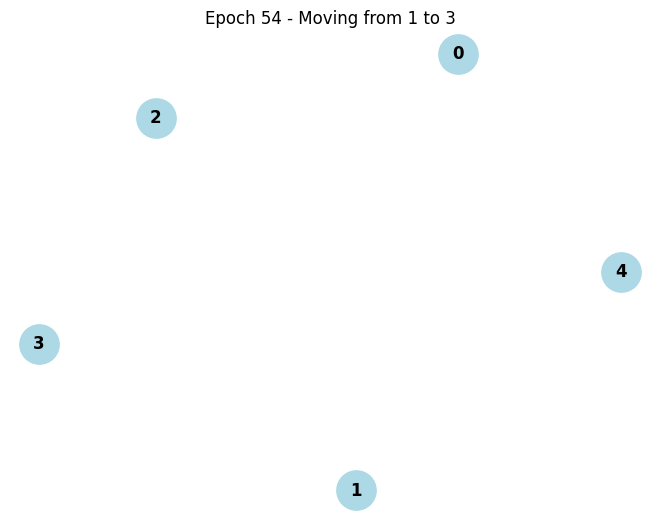

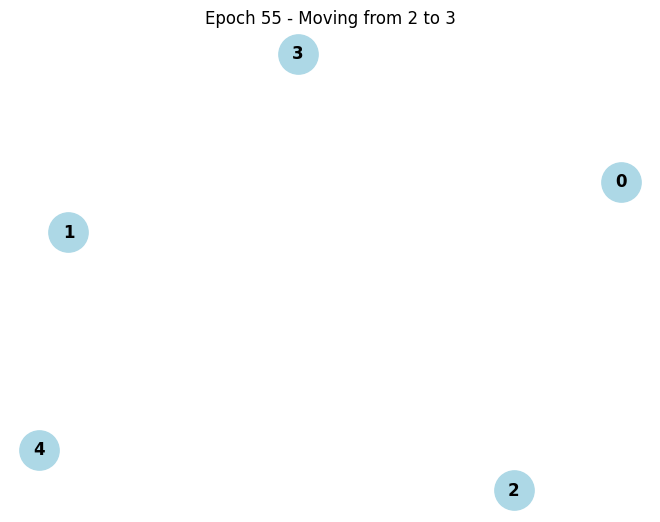

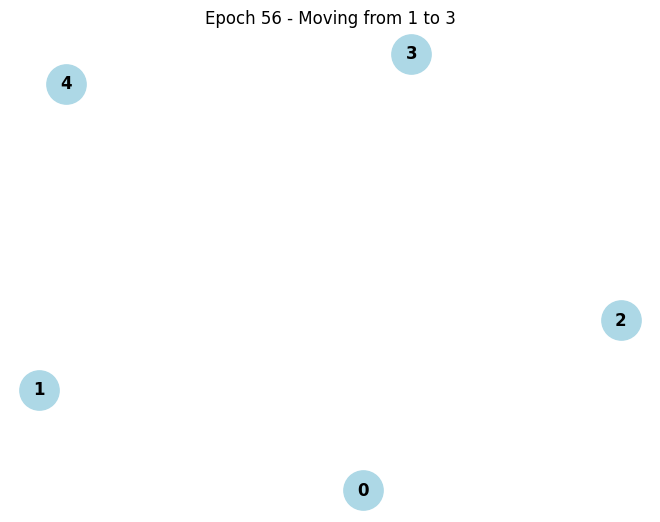

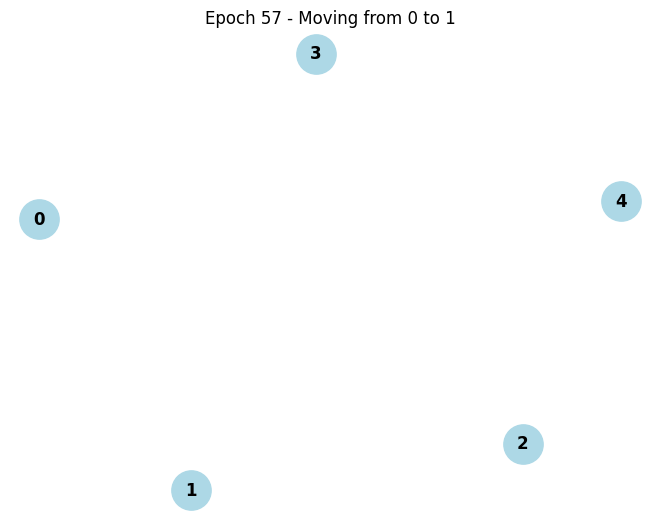

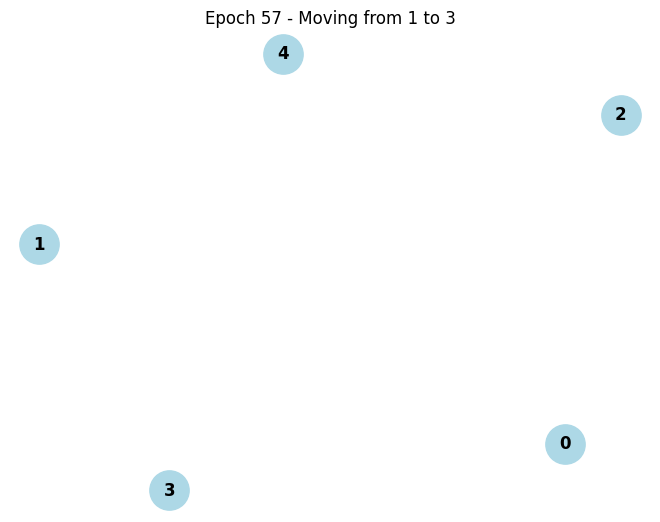

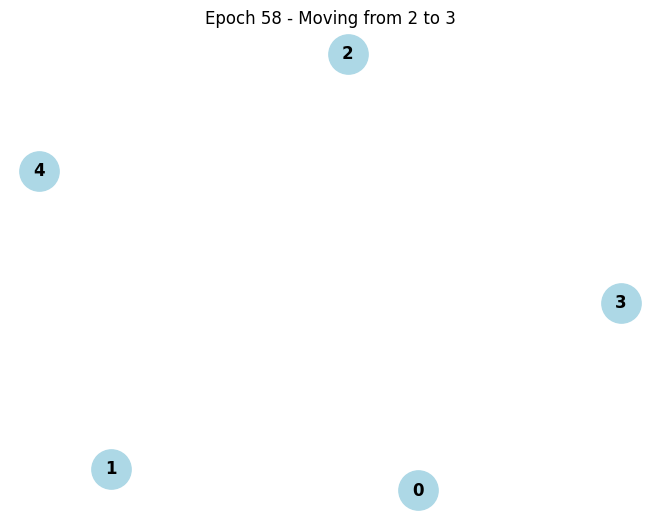

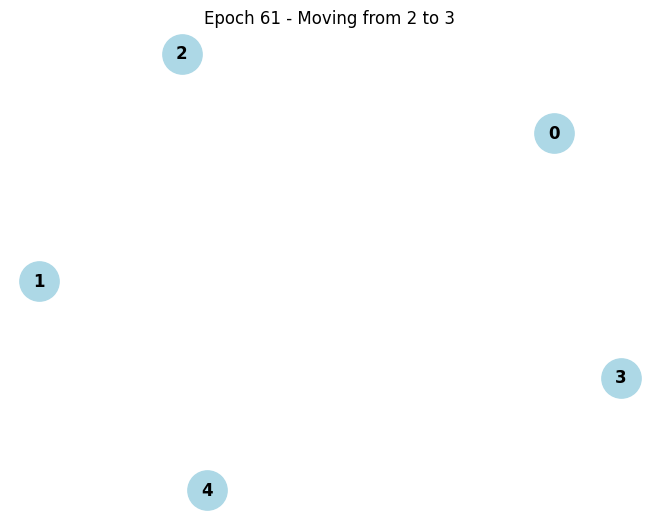

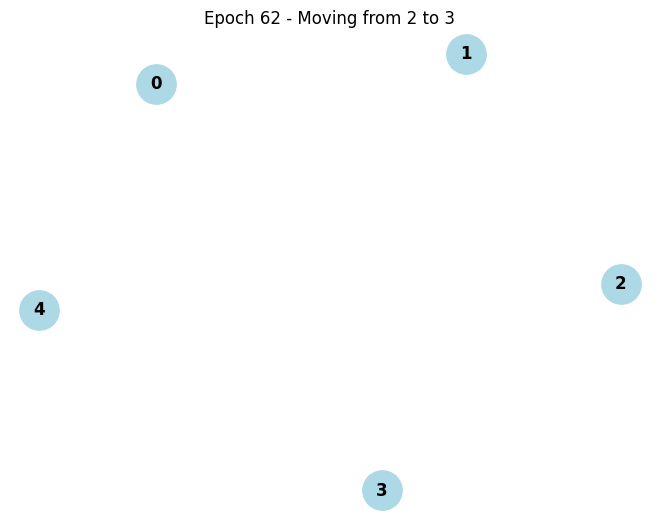

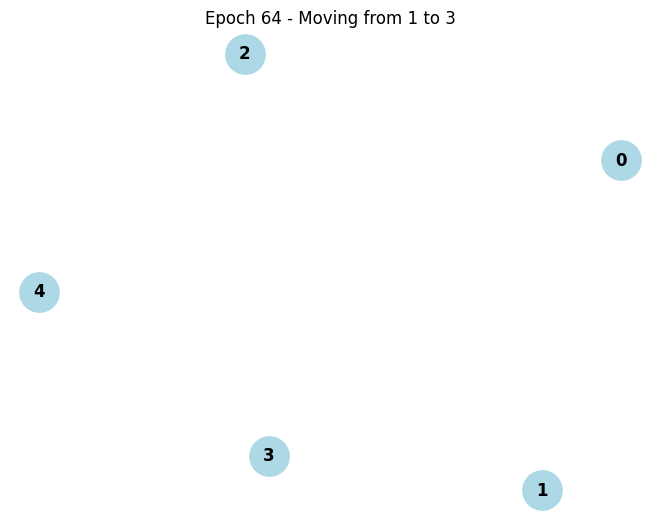

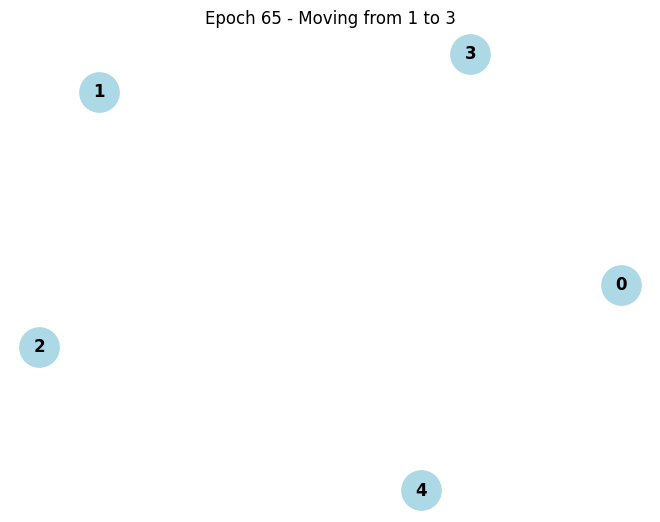

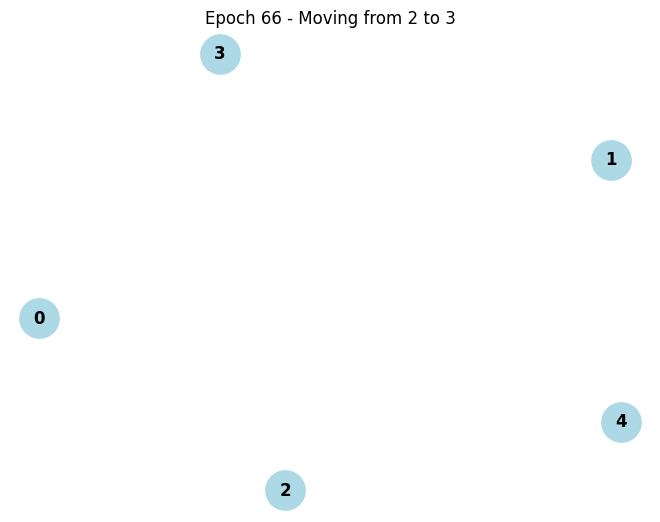

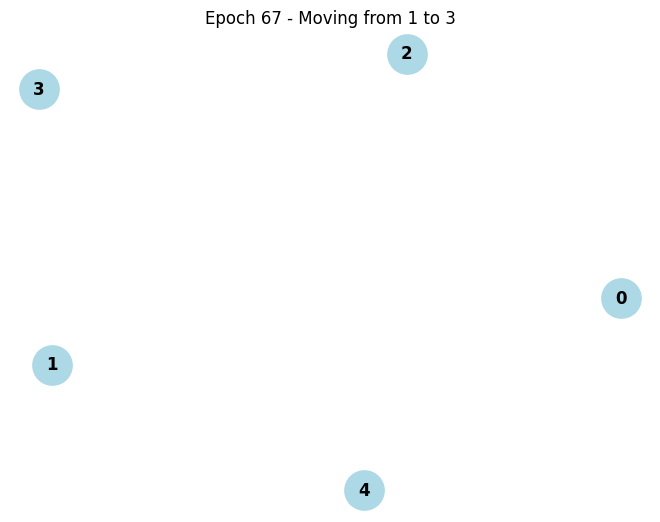

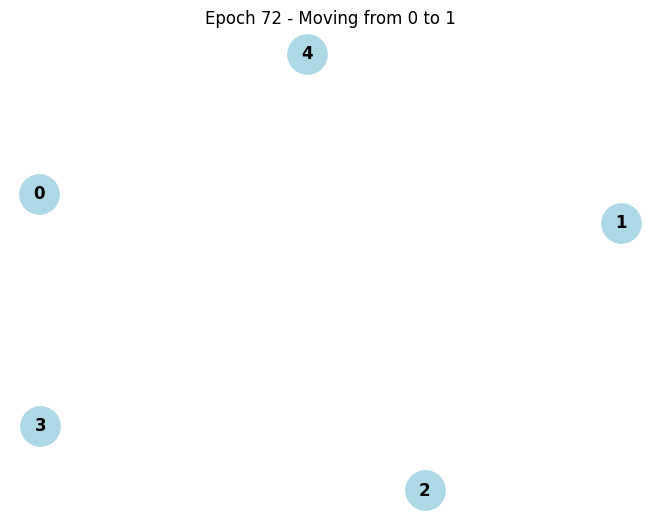

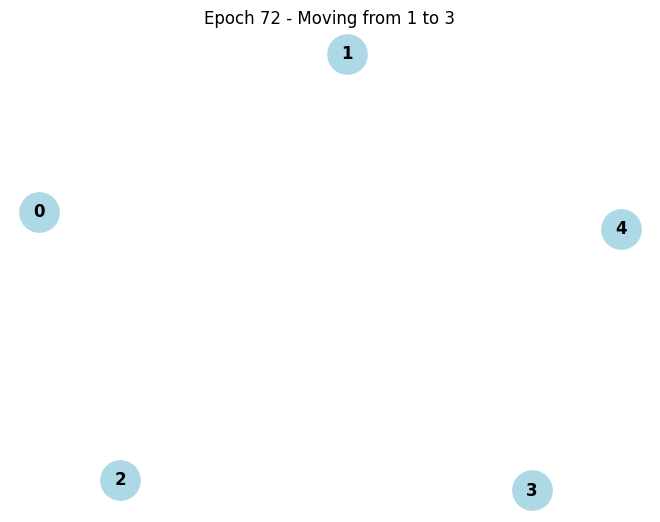

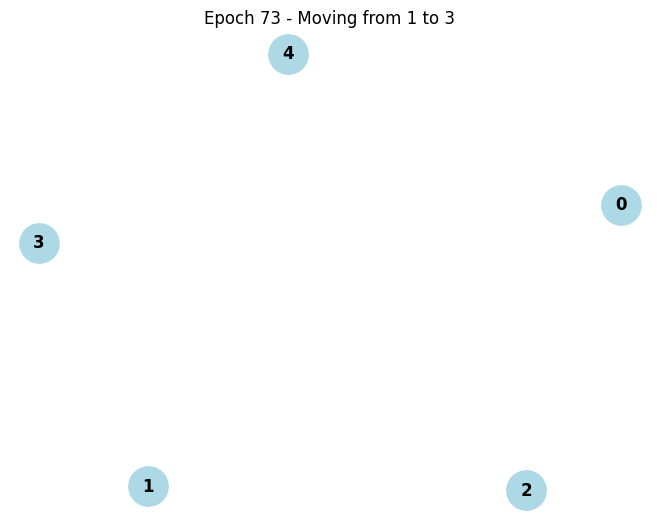

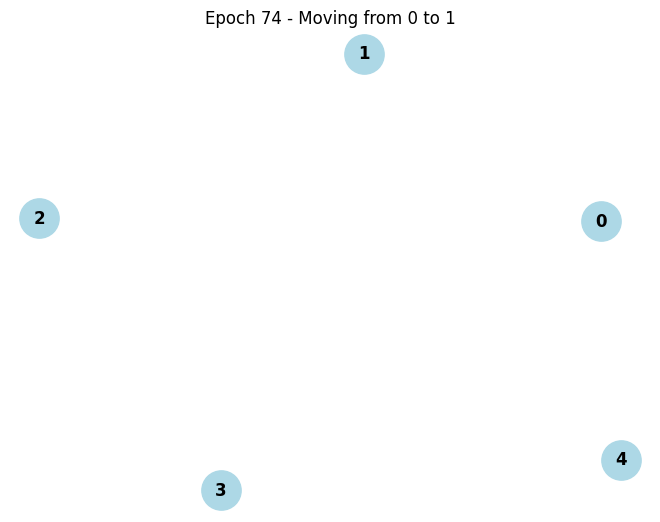

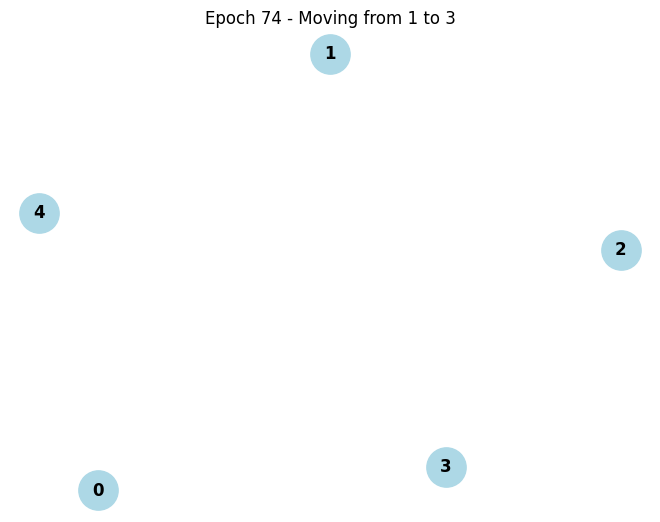

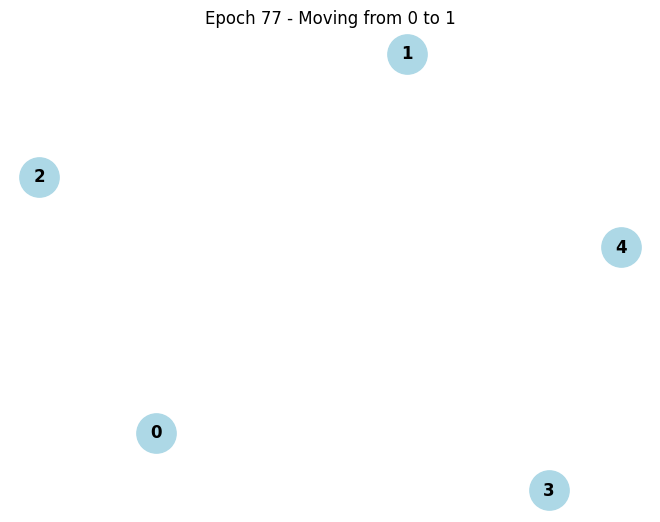

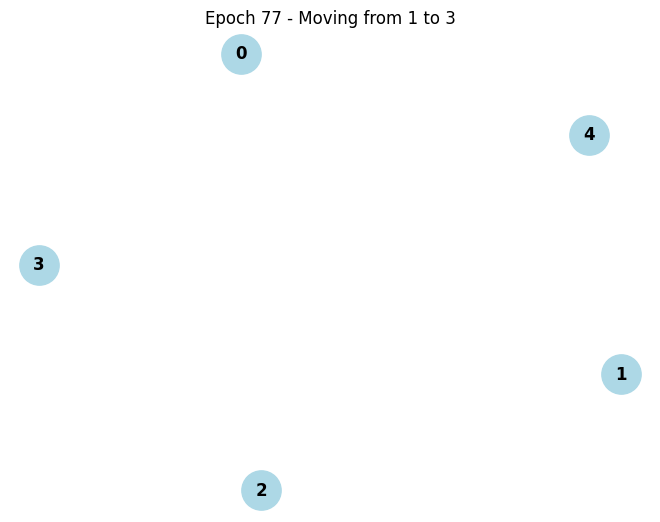

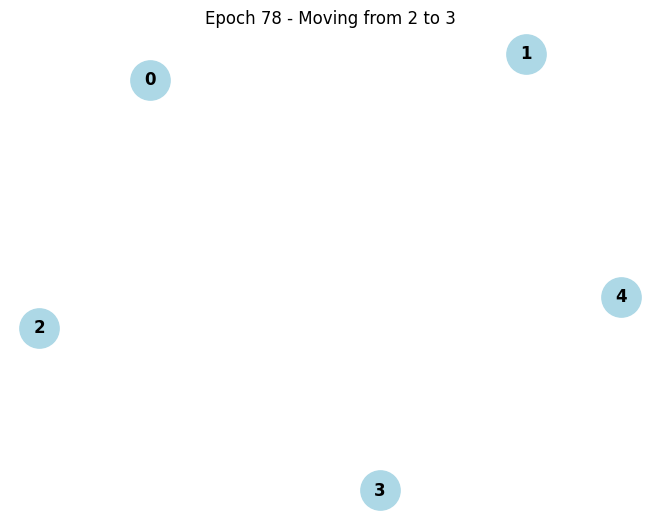

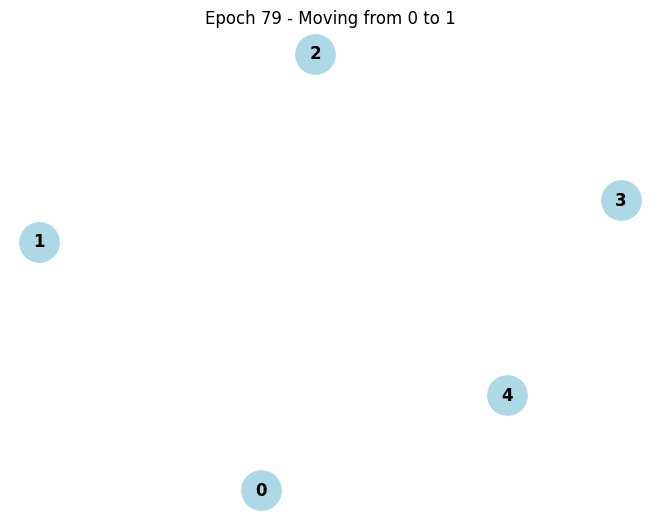

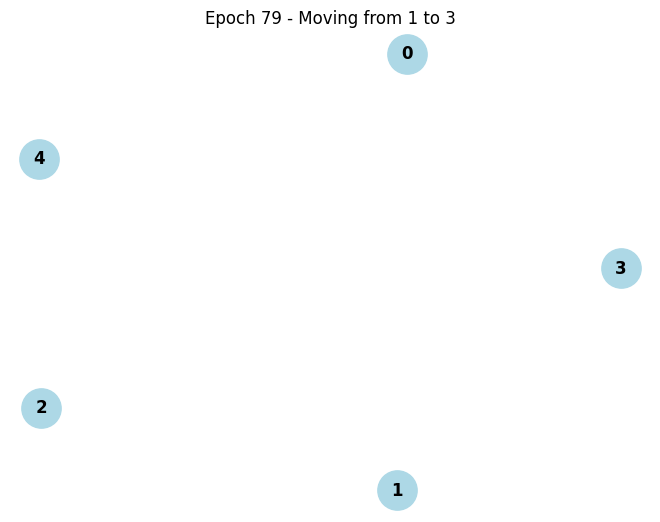

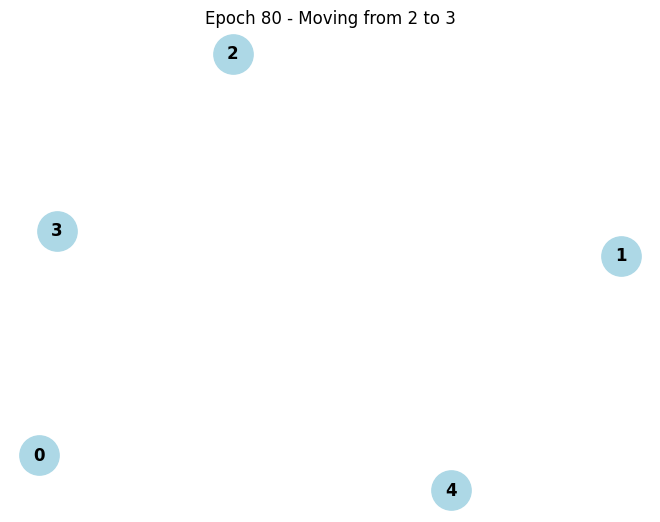

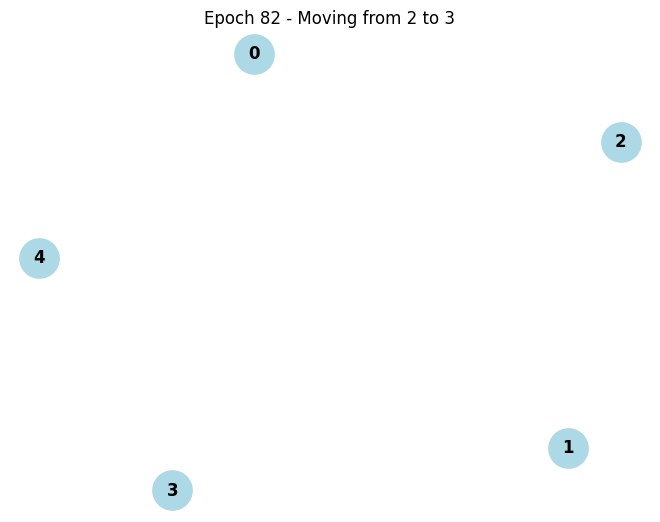

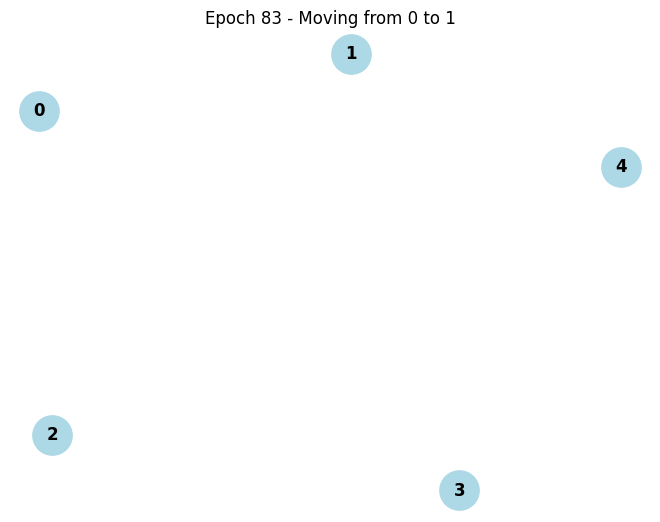

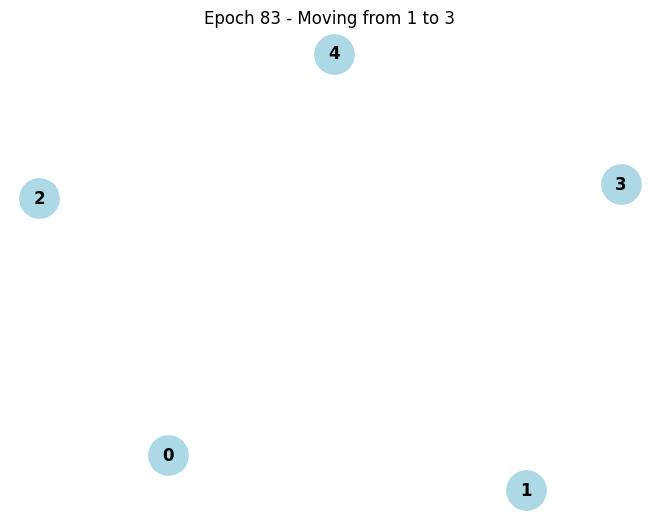

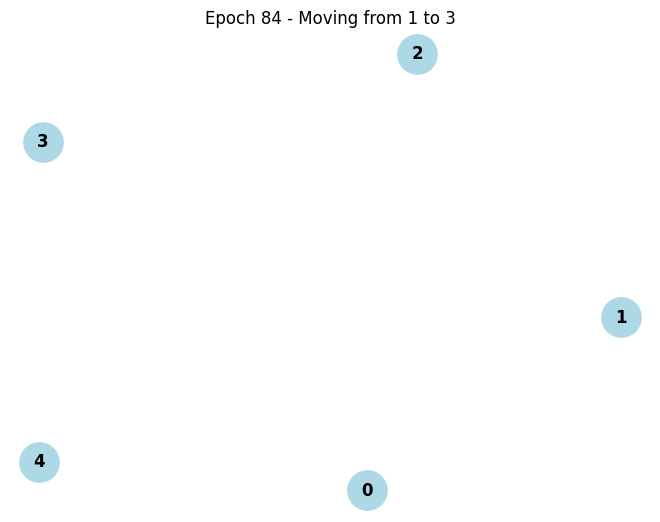

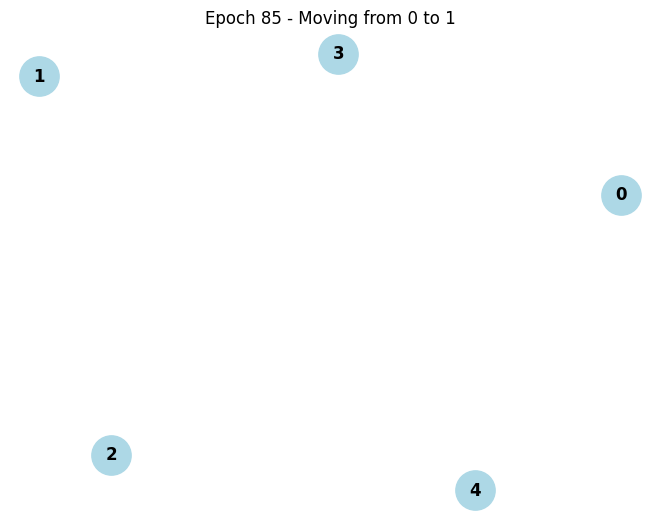

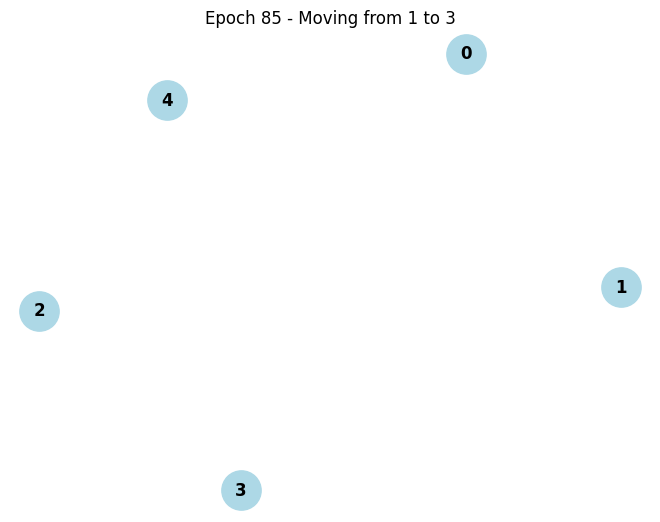

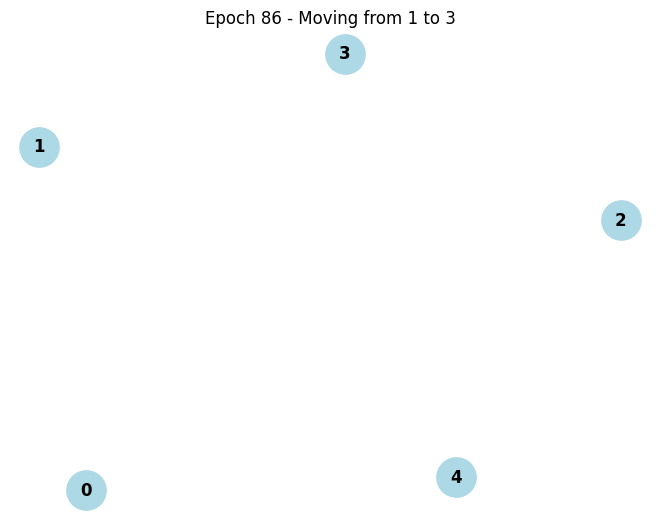

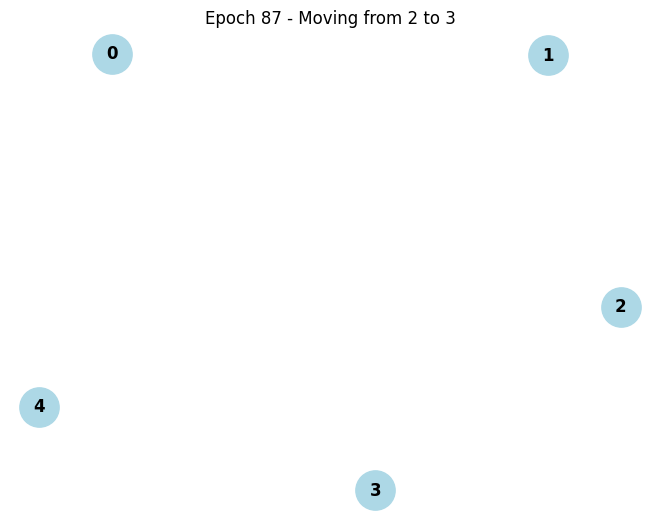

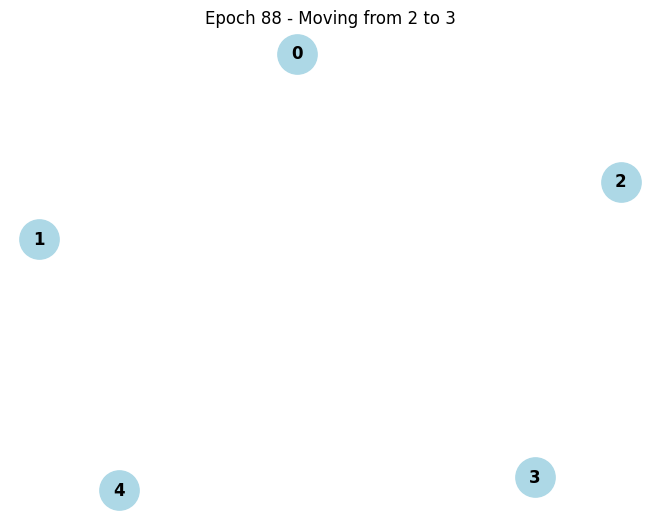

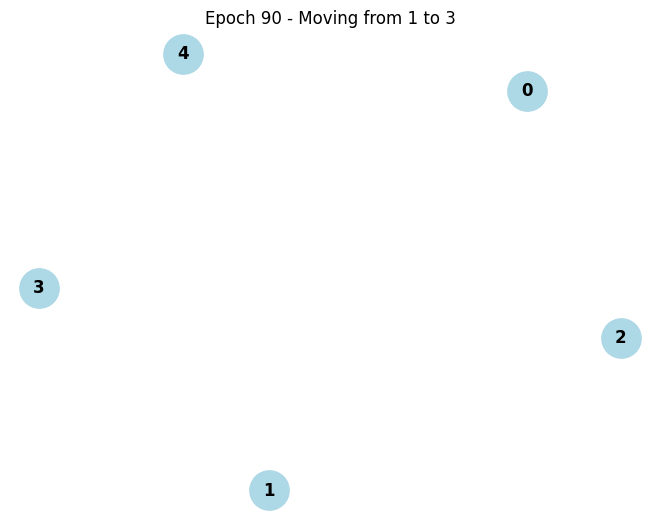

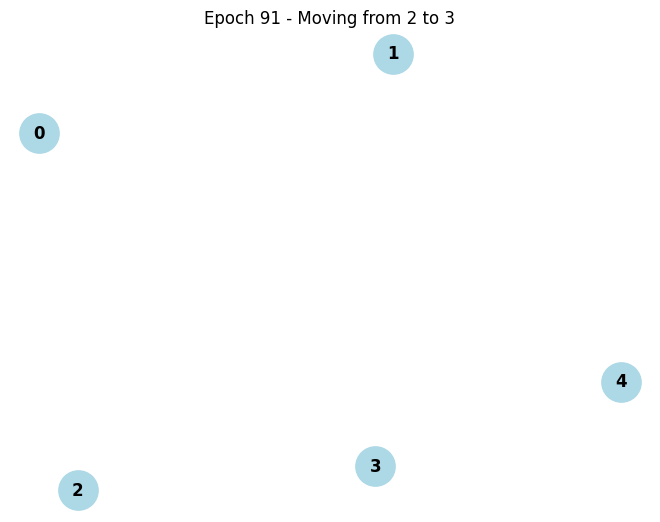

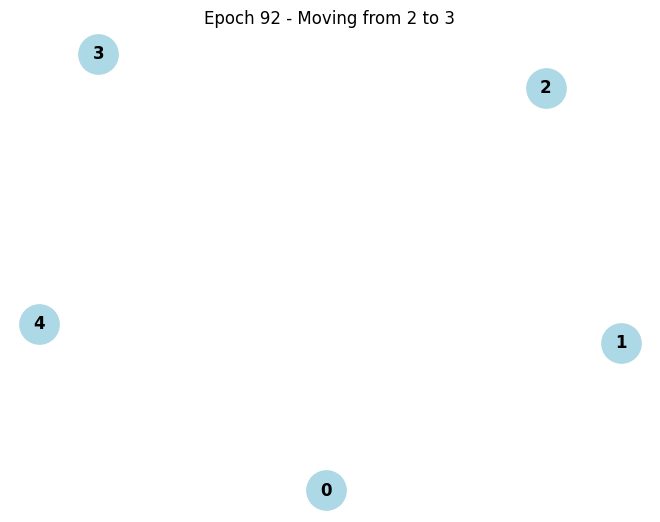

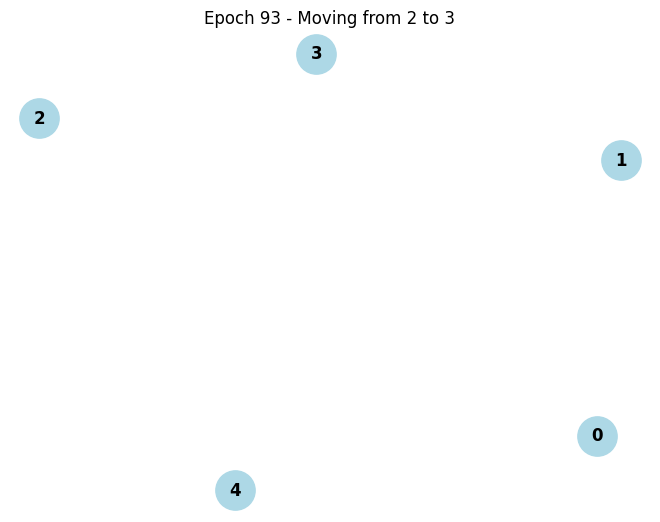

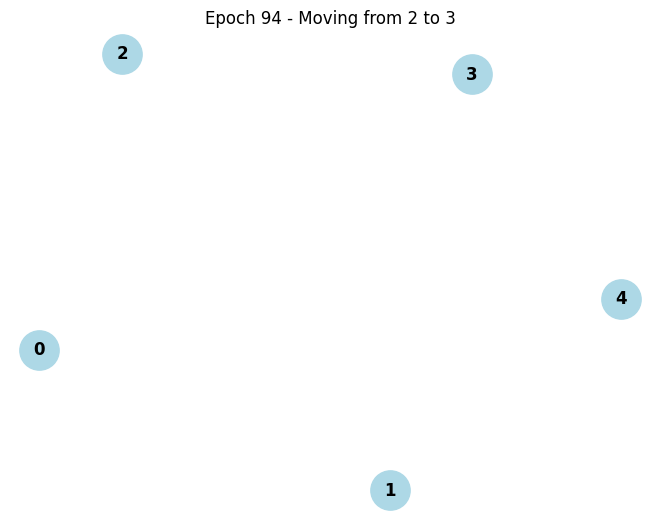

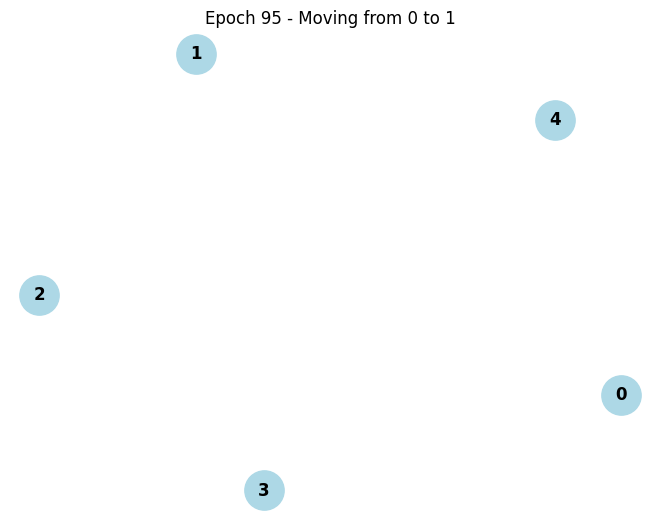

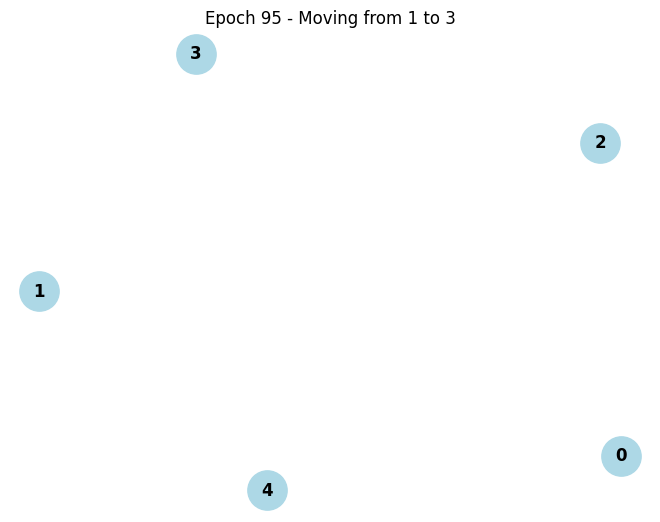

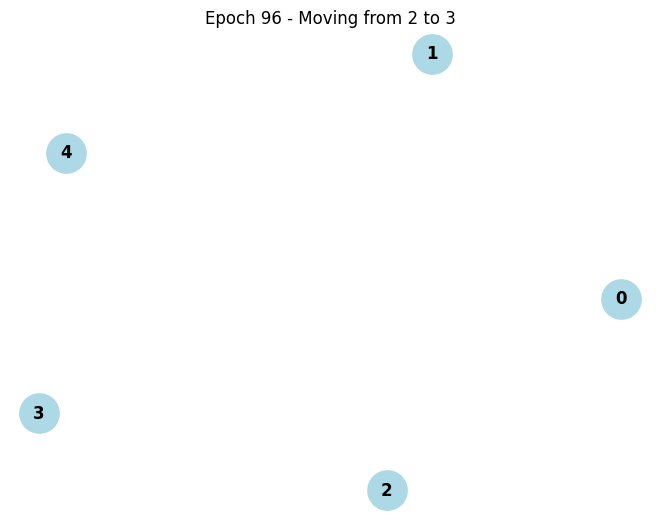

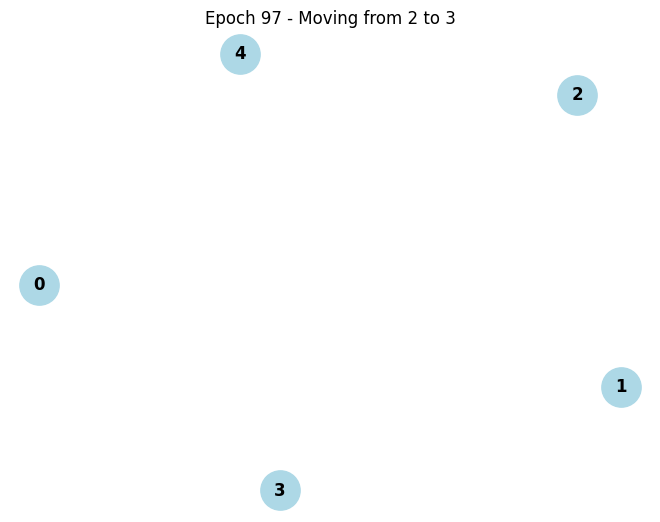

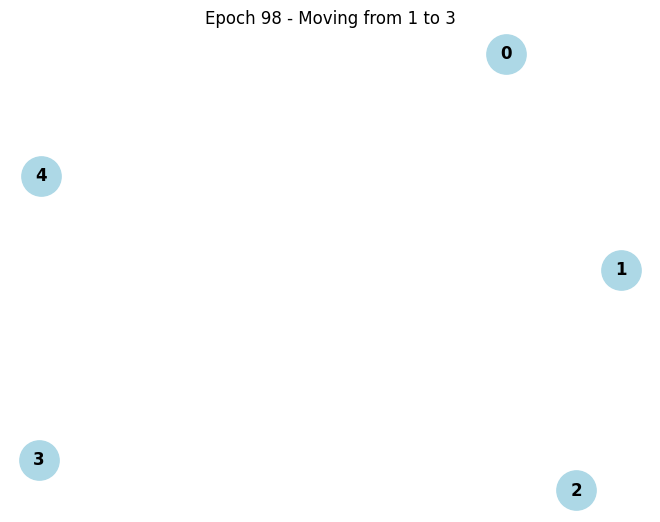

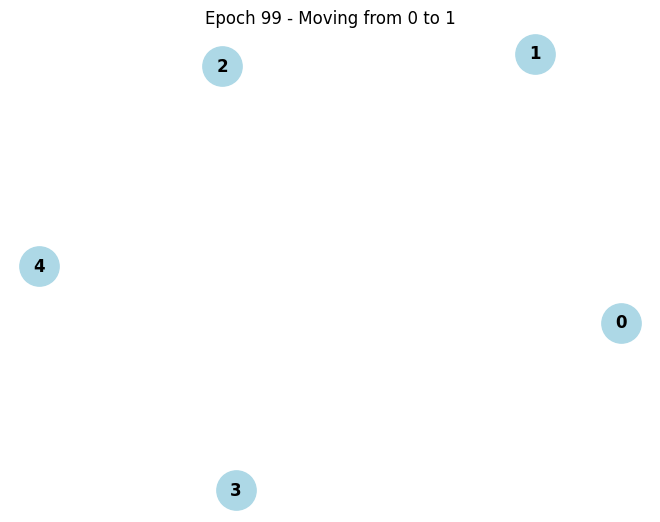

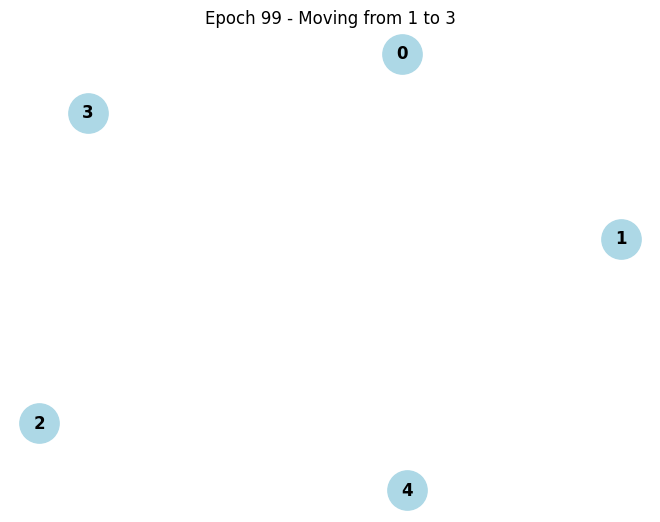

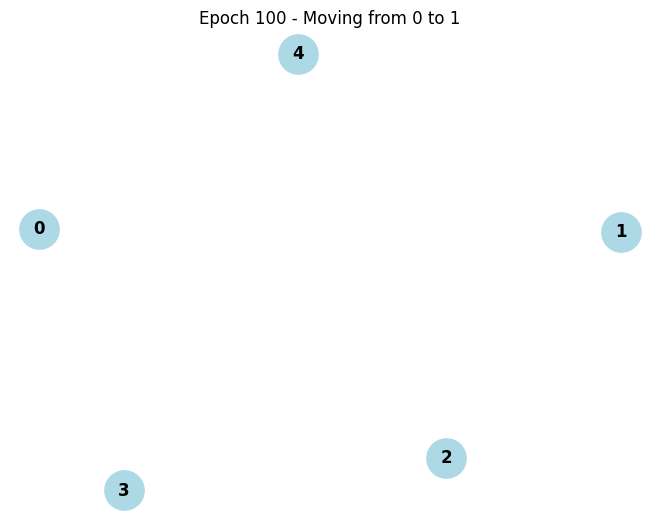

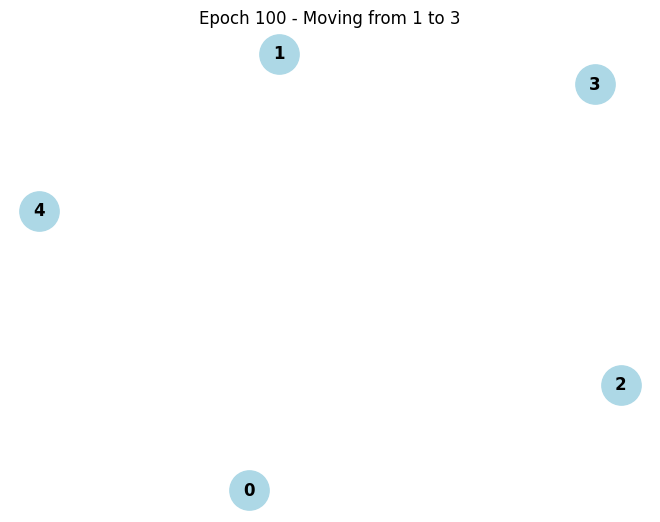

Optimal path from node 0 to the closest destination: [0, 1, 3]
Optimal path from node 1 to the closest destination: [1, 3]
Optimal path from node 2 to the closest destination: [2, 3]
Optimal path from node 3 to the closest destination: [3]
Optimal path from node 4 to the closest destination: [4]


In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class QLearning:
    def __init__(self, num_nodes, destinations, learning_rate=0.8, discount_factor=0.95, exploration_prob=0.2, epochs=10):
        self.num_nodes = num_nodes
        self.destinations = destinations
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.epochs = epochs

        # Initialize Q matrix with zeros
        self.Q = np.zeros((num_nodes, num_nodes))

        # Initialize rewards matrix
        self.R = np.zeros((num_nodes, num_nodes))

    def add_edge(self, start_node, end_node, reward):
        self.R[start_node][end_node] = reward

    def train(self, visualize=False):
        G = nx.Graph()
        G.add_nodes_from(range(self.num_nodes))

        for epoch in range(self.epochs):
            current_state = np.random.randint(0, self.num_nodes)

            while current_state not in self.destinations:
                possible_moves = np.where(self.R[current_state] > 0)[0]
                if np.random.rand() < self.exploration_prob:
                    action = np.random.choice(possible_moves)
                else:
                    action = np.argmax(self.Q[current_state])

                next_state = action
                reward = self.R[current_state][action]

                self.Q[current_state][action] = reward + self.discount_factor * np.max(self.Q[next_state])

                if visualize:
                    plt.clf()
                    nx.draw(G, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800)
                    plt.title(f'Epoch {epoch + 1} - Moving from {current_state} to {action}')
                    plt.pause(0.5)

                current_state = next_state

        if visualize:
            plt.show()

    def find_optimal_path(self, start_node):
        current_state = start_node
        optimal_path = [current_state]

        while current_state not in self.destinations:
            action = np.argmax(self.Q[current_state])
            current_state = action
            optimal_path.append(current_state)

        return optimal_path

# Example usage with visualization
num_nodes = 5
destinations = [3, 4]
q_learning = QLearning(num_nodes, destinations)

# Add edges and rewards (adjust the rewards based on your specific graph)
q_learning.add_edge(0, 1, 10)
q_learning.add_edge(0, 2, 5)
q_learning.add_edge(1, 3, 20)
q_learning.add_edge(2, 3, 30)
q_learning.add_edge(3, 4, 100)

# Train the Q-learning model with visualization
q_learning.train(visualize=True)

# Find optimal path for each node to the closest destination
for start_node in range(num_nodes):
    optimal_path = q_learning.find_optimal_path(start_node)
    print(f"Optimal path from node {start_node} to the closest destination: {optimal_path}")
